In [1]:
import configparser
import Hyperparameter_Tuner as HPT

#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split

class Optimizer:
    def __init__(self, config_file_name):
        self.config = config_file_name

        self.ML_algorithm = {}
        self.Opt_algorithm = {}
        #self.iris_dataset = load_iris()
        #self.iris_x, self.iris_X_test, self.iris_y, self.iris_y_test = train_test_split(self.iris_dataset['data'], self.iris_dataset['target'], random_state=0)

    def get_config(self):
        # read config file and save content as attribute
        self.configparser = configparser.ConfigParser()
        self.configparser.read('../' + self.config)
        
        # store ml_algorithm & opt_algorithm after change string to list
        # using dictionary in dictionary such as {BO : {A:1, B:2}, PSO : {C:3, D:4}}
        for opt in self.configparser['Opt_algorithm']['Opt_name'].split(','):
            hp_dict = {}
            opt_str = opt.strip().upper()
            for hp in self.configparser[opt_str + '_Hyperparameter']:
                hp_dict[hp] = self.configparser[opt_str + '_Hyperparameter'][hp]
            self.Opt_algorithm[opt_str] = hp_dict

        print(self.Opt_algorithm)

        for ml in self.configparser['ML_algorithm']['ML_name'].split(','):
            hp_dict = {}
            if ml.strip().upper() == 'RANDOMFOREST':
                ml_str = 'RF'
            else:
                ml_str = ml.strip().upper()
            for hp in self.configparser[ml_str + '_Hyperparameter']:
                hp_list = []
                if hp == 'kernel':
                    for ker in self.configparser[ml_str+'_Hyperparameter'][hp].split(','):
                        hp_list.append(ker.strip().strip("'").strip("'"))
                    hp_dict[hp] = hp_list

                else:
                    hp_num = self.configparser[ml_str+ '_Hyperparameter'][hp].split(',')
                    if hp_num[2].strip().strip('[').strip(']') == 'int':
                        hp_list.append(int(hp_num[0].strip().strip('[').strip(']')))
                        hp_list.append(int(hp_num[1].strip().strip('[').strip(']')))
                    elif hp_num[2].strip().strip('[').strip(']') == 'int':
                        hp_list.append(float(hp_num[0].strip().strip('[').strip(']')))
                        hp_list.append(float(hp_num[1].strip().strip('[').strip(']')))
                    hp_dict[hp] = hp_list
                self.ML_algorithm[ml_str] = hp_dict
 
            print(self.ML_algorithm)
 
    def run_Hyperparameter_Tuner(self):
        for opt_al in self.Opt_algorithm.keys():
            #with HPT.Hyperparameter_Tuner(opt_al, self.Opt_algorithm[opt_al], self.ML_algorithm) as Hyperparameter_Tuner_class:
                #Hyperparameter_Tuner_class.run_opt_algorithm()
            HPT_class = HPT.Hyperparameter_Tuner(opt_al, self.Opt_algorithm[opt_al], self.ML_algorithm)
            HPT_class.load_data()
            HPT_class.run_opt_algorithm()

{'PSO': {'num_particles': '10', 'num_generations': '50', 'num_out_fold': '2', 'num_in_fold': '2'}}
{'SVM': {'c': [2, 50], 'loggamma': [-5, 5], 'kernel': ['linear']}}
Index(['smart_5_normalized', 'smart_5_raw', 'smart_187_normalized',
       'smart_187_raw', 'smart_189_normalized', 'smart_189_raw'],
      dtype='object')
        failure
145132        0
348876        0
1416          1
833857        0
243           1
...         ...
671211        0
638           1
4556          1
285290        0
585           1

[9598 rows x 1 columns]
9598
9598
load end


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


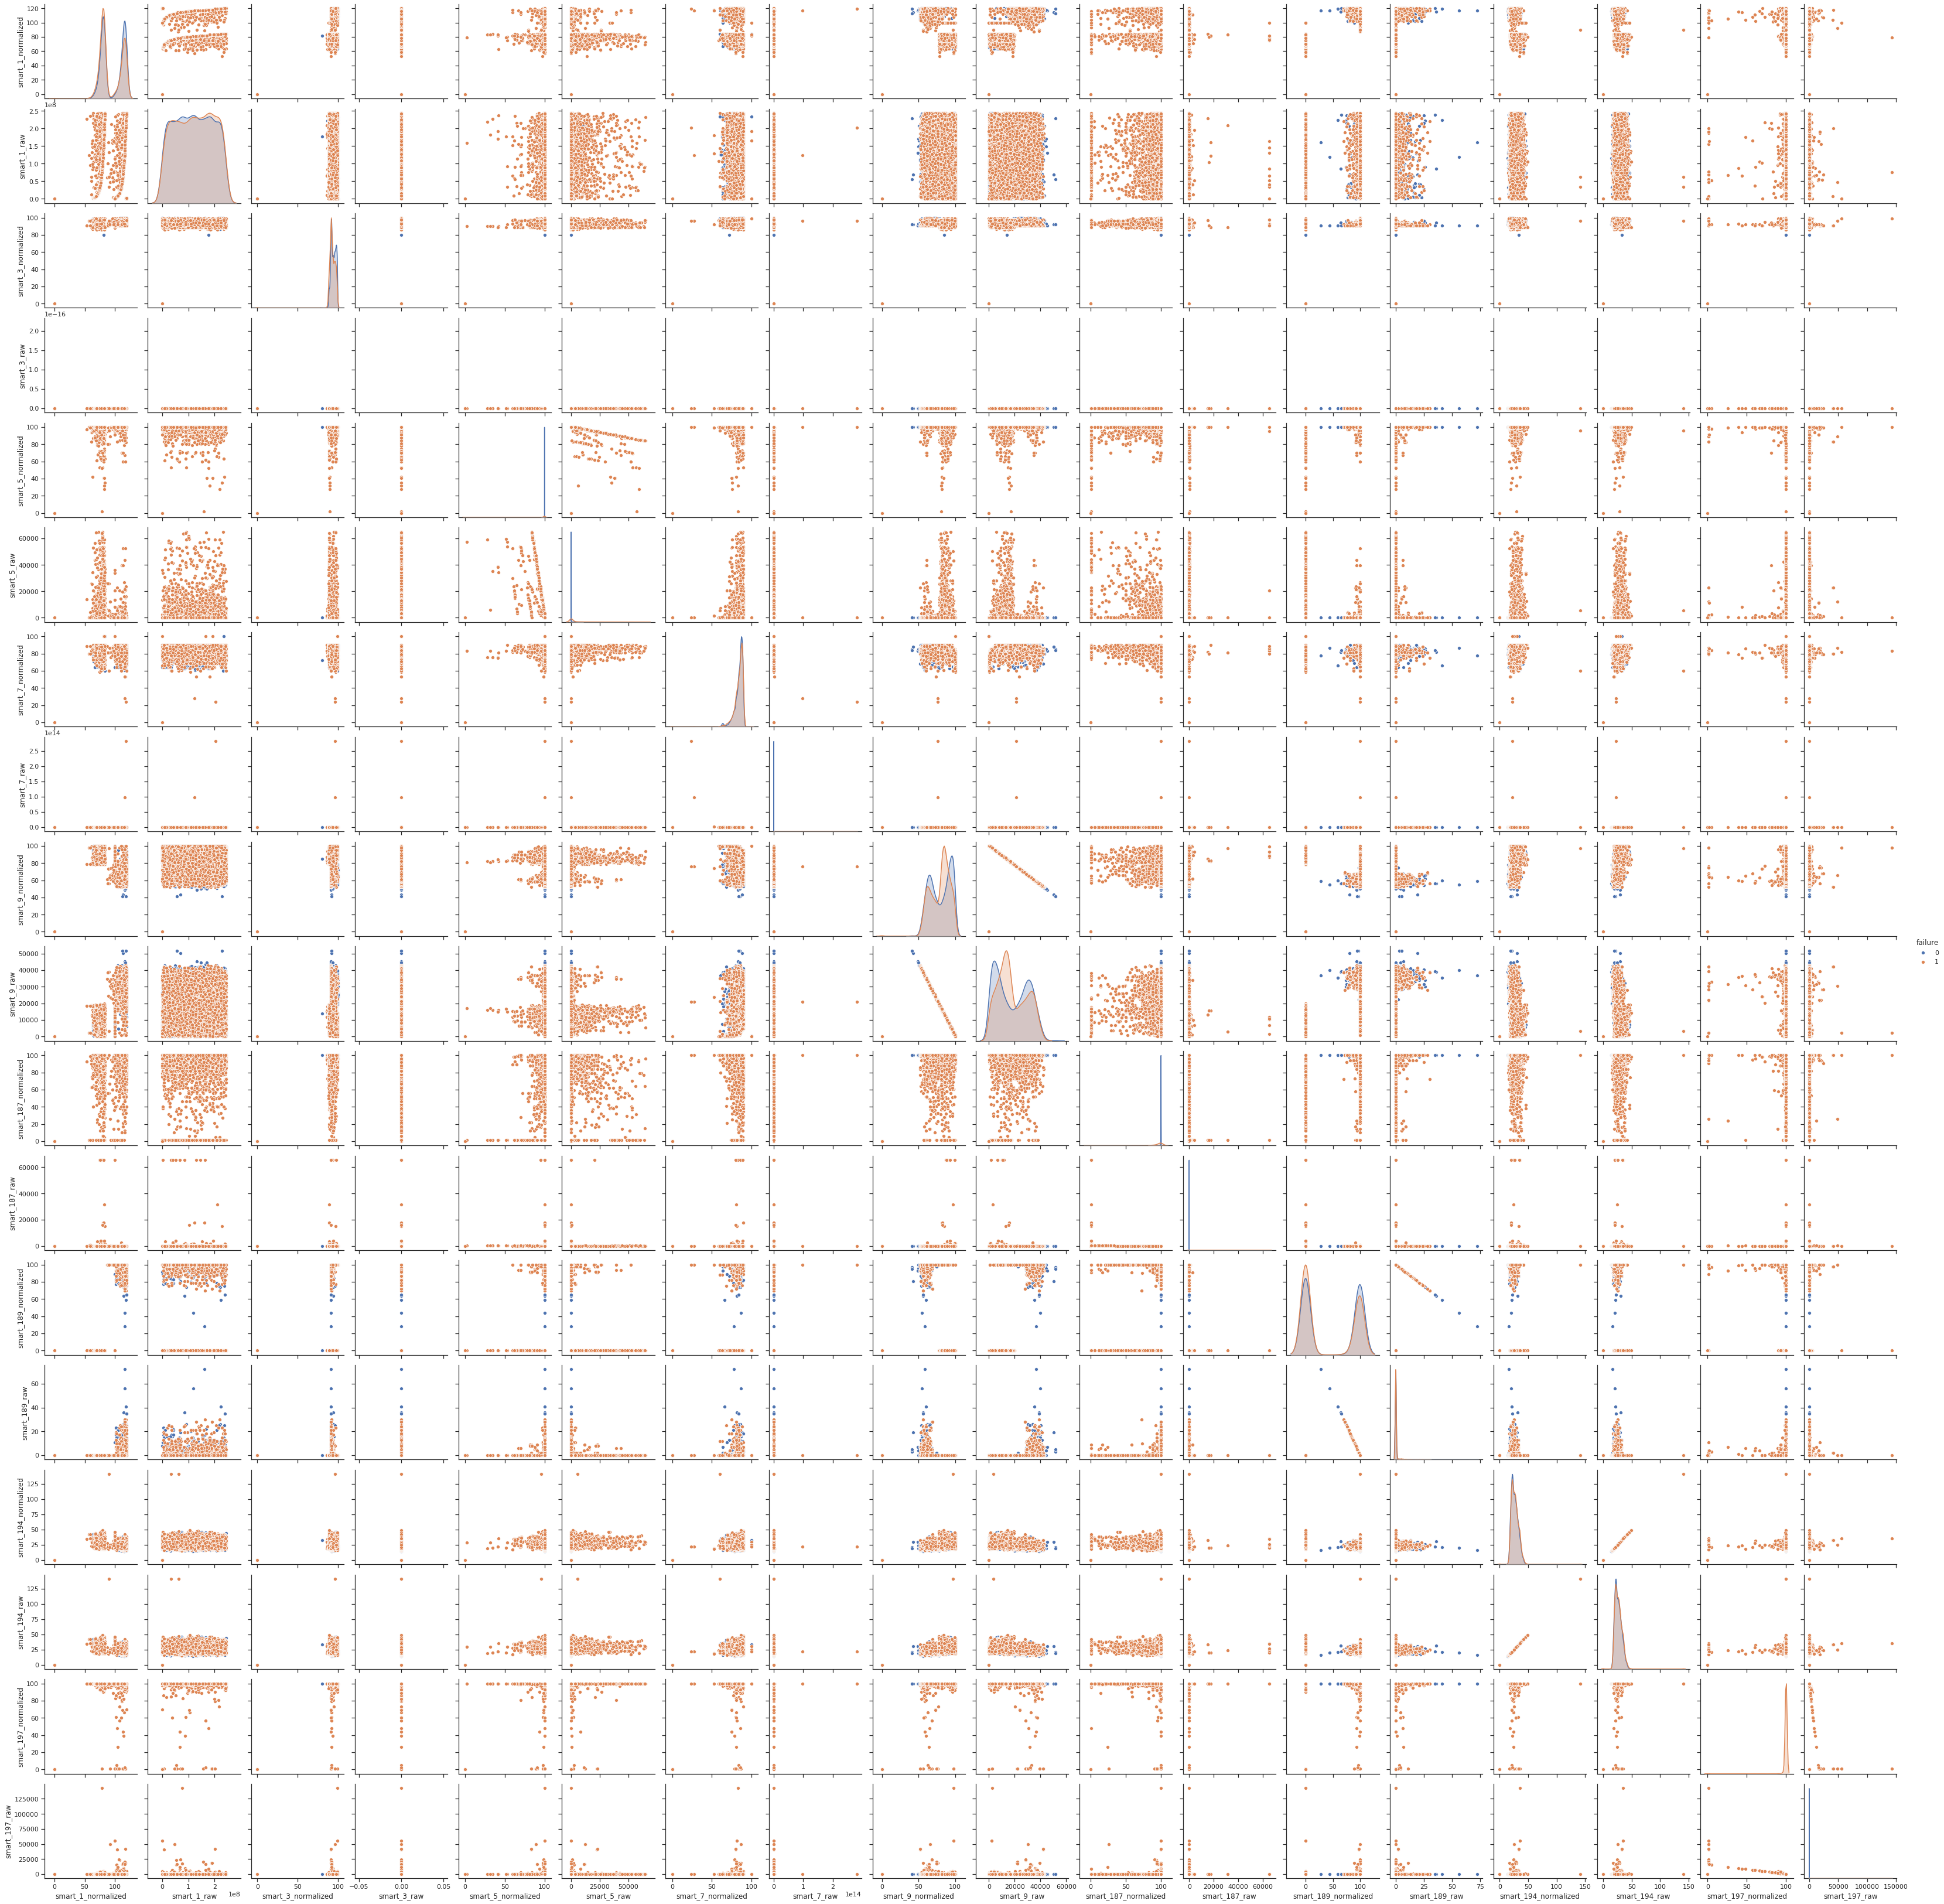


PSO SVM train
{'c': [2, 50], 'loggamma': [-5, 5]}
{'num_particles': '10', 'num_generations': '50', 'num_out_fold': '2', 'num_in_fold': '2'}
c : 20.9375, loggamma : -1.7578125, kernel : linear
accuracy 0.7949145477282201


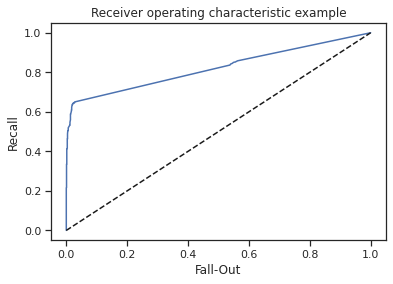

0.7346278317152104
c : 20.9375, loggamma : -1.7578125, kernel : linear
accuracy 0.7670833333333333


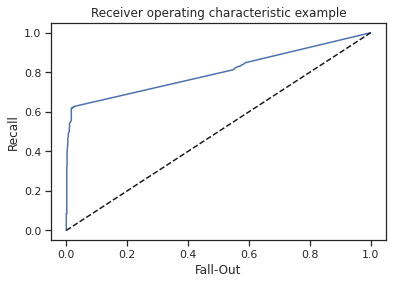

0.6970189701897019
0  0  0
c : 44.9375, loggamma : 3.2421875, kernel : linear
accuracy 0.7978324301792413


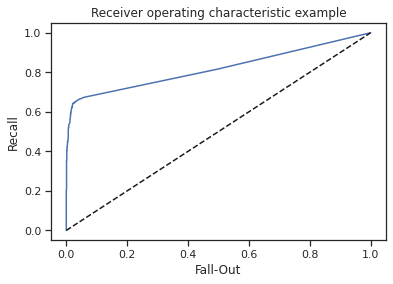

0.7396672034353194


KeyboardInterrupt: 

In [2]:
opt = Optimizer('config')
opt.get_config()
opt.run_Hyperparameter_Tuner()